# Predict A Doctor's Consultation Fee 

### Problem statement 

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records

## Features:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
train_df=pd.read_csv('Final_Train.csv')

In [3]:
test_df=pd.read_csv('Final_test.csv')

### checking dimensions of data

In [4]:
train_df.shape

(5961, 7)

here we have 5961 rows and 7 columns in the train dataframe

In [5]:
test_df.shape

(1987, 6)

we have 1987 rows and 6 columns in the test dataframe

### check entries in the data frame by head function

In [6]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [7]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Here both data frames has same columns but in train data we have one more extra column Fees which is our target variable. 

here we need to train with train dataframe and the we have to test with test dataframe and predict the doctor concultation fees 

### checking dtypes in dataframe

In [8]:
train_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

except Fee column all the 6 columns we have object dtype only

In [9]:
test_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

all 6 columns we have object datype only

### chcking info function 

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


### checking null values

In [12]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

we have null values in Rating,Place and Miscellaneous_Ifo columns if we try to drop these null values we loss more data so we need to fix these null values by fillna function

<AxesSubplot:>

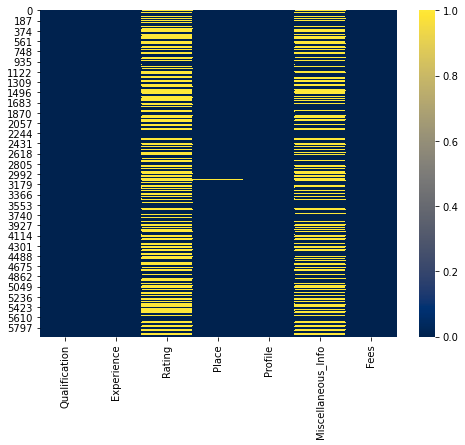

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df.isnull(),cmap='cividis')

here we can clearly see that how many entries has null values 

1.Rating has 3302 null values 

2.Place has 25 null values

3.Miscellaneous_Info has 2620 null vlaues 

In [14]:
train_df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [15]:
pd.set_option('display.max_rows',None)

In [16]:
train_df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [17]:
train_df=train_df.drop('Miscellaneous_Info',axis=1)

In [18]:
train_df.dtypes

Qualification    object
Experience       object
Rating           object
Place            object
Profile          object
Fees              int64
dtype: object

In [19]:
for col in ['Rating','Place']:
    train_df[col].fillna(train_df[col].mode()[0],inplace=True)

In [20]:
train_df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [21]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

as we have null values in same columns we have null value in the test dataframe

<AxesSubplot:>

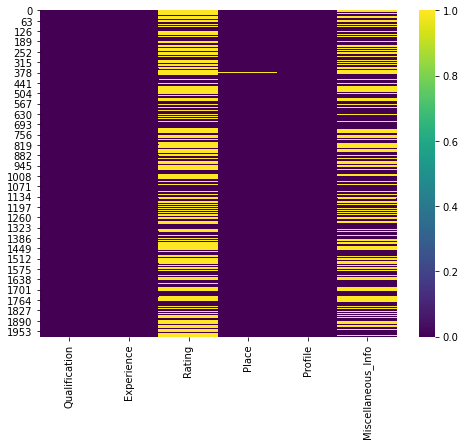

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(test_df.isnull(),cmap='viridis')

plost shows that we have so many missing values

1.Rating has 1090 null values

2.Place has 6 null values

3.Miscellaneous_Info has 834 null values

we droped Miscellaneous_Info column in train dataframe we have to drop here also and fill null values as we did in train dataframe

In [23]:
test_df=test_df.drop('Miscellaneous_Info',axis=1)

In [24]:
for col in ['Rating','Place']:
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)

In [25]:
test_df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

we are cleared all the null values in both dataframes

In [26]:
df_ss=pd.read_csv('Sample_submission.csv')

In [27]:
df_ss.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


# Data Visualization

In [28]:
#join the sample data to test datafrmae
df_test=pd.concat([test_df,df_ss], axis =1)

In [29]:
#identification of data 
train_df['source']='train'
df_test['source']='test'

In [30]:
#concat train and test data
df=pd.concat([train_df,df_test])

In [31]:
df.sample(10)

,Qualification,Experience,Rating,Place,Profile,Fees,source
125,"MBBS, DDV",15 years experience,95%,"Chandivali, Mumbai",Dermatologists,600,train
280,"MBBS, DDVL",13 years experience,100%,"Ullal Upanagara, Bangalore",Dermatologists,1368,test
1387,MBBS,16 years experience,100%,"Sarjapur Road, Bangalore",General Medicine,400,train
75,"MBBS, MD - Rheumatology",40 years experience,93%,"Lakdikapul, Hyderabad",General Medicine,500,train
2554,"MBBS, DNB",34 years experience,100%,"Jayanagar 9 Block, Bangalore",General Medicine,300,train
3277,BHMS,3 years experience,100%,"Tambaram East, Chennai",Homeopath,200,train
2746,BAMS,24 years experience,100%,"Andheri East, Mumbai",Ayurveda,100,train
4658,BAMS,15 years experience,98%,"T Nagar, Chennai",Ayurveda,500,train
910,MBBS,49 years experience,100%,"Gandhinagar, Hyderabad",General Medicine,1773,test
4413,BHMS,5 years experience,100%,"Malleswaram, Bangalore",Homeopath,100,train


we concated both dataframes for visualization 

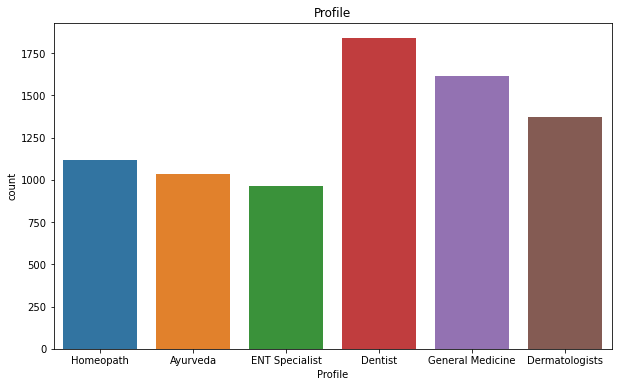

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64


In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=df)
plt.title('Profile')
plt.show()
print(df['Profile'].value_counts())

we have more Dentist in dataframes

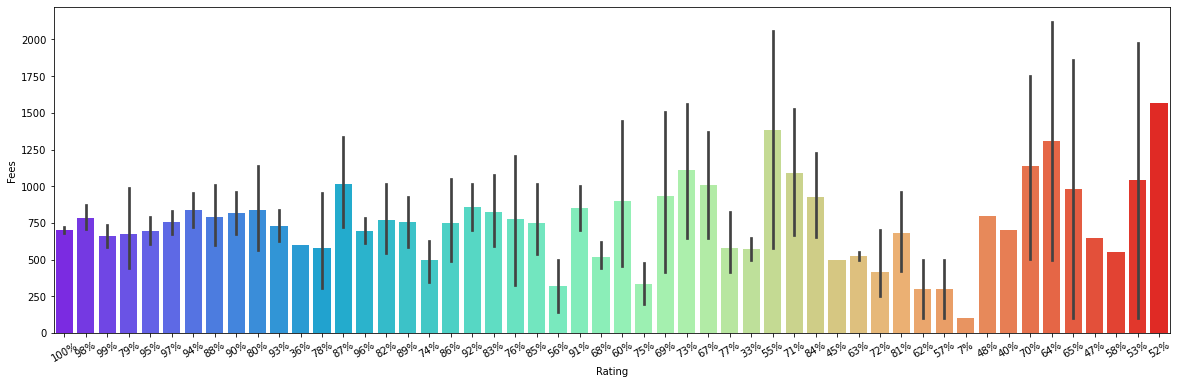

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(y='Fees',x='Rating' ,data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

From above graph we can say that Rating of 52% doctors have the highest Fees.

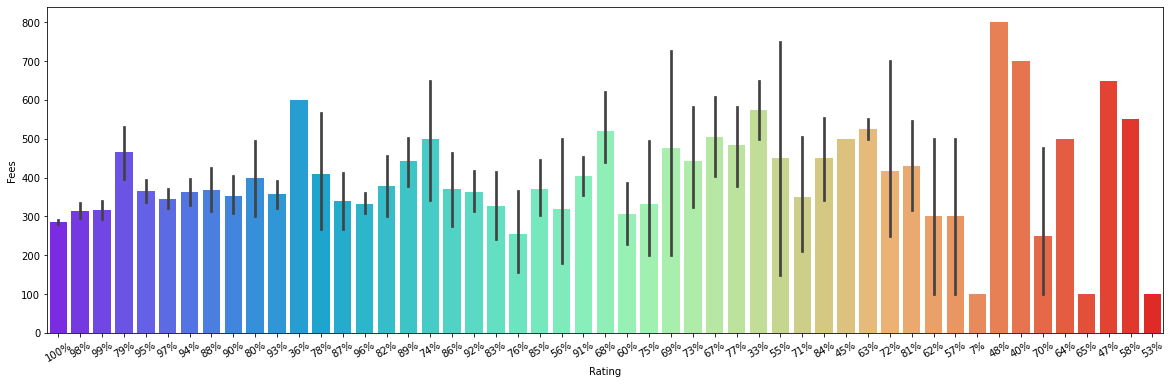

In [34]:
plt.figure(figsize=(20,6))
sns.barplot(y='Fees',x='Rating' ,data=train_df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

from above graph we can say that Rating of 48% doctors have the highest Fees.

In [35]:
df['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

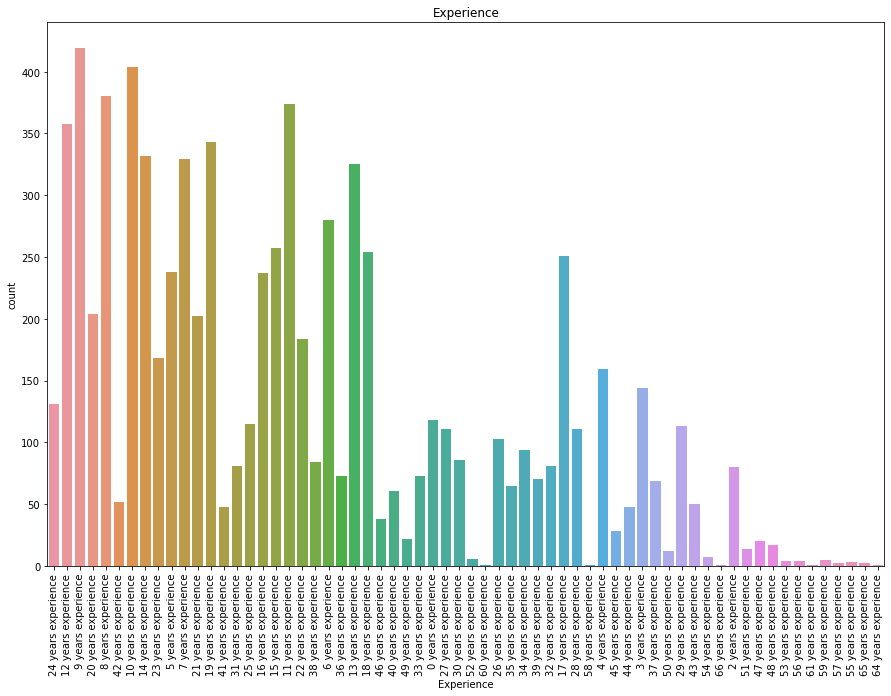

In [36]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Experience',data=df)
plt.title('Experience')
plt.show()

From above graph we can say that the doctors which have 9 years of have the highest Fees

In [37]:
df['Qualification'].value_counts()

BDS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         632
BHMS                                                                                                                                                                                                                                                                                                                                                                                                    

In [38]:
df['Qualification_count'] = df['Qualification'].apply(lambda x: len(x.split(",")))

In [39]:
df['Qualification_count'].unique()

array([ 2,  1,  3,  5,  6,  4,  7,  9, 10,  8, 17], dtype=int64)

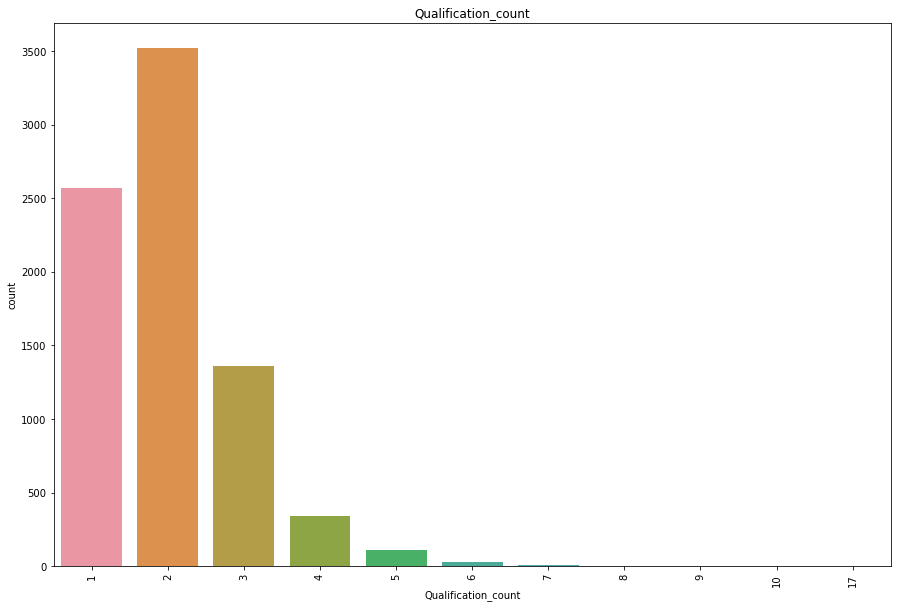

In [40]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Qualification_count',data=df)
plt.title('Qualification_count')
plt.show()

In [41]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [42]:
df['experience'] = df['Experience'].str.slice(stop=2).astype(int)

In [43]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['profile']=le.fit_transform(df['Profile'])

In [45]:
df['City'] = df['Place'].apply(lambda x: len(x.split(",")))

In [46]:
df['City'] = df['Place'].str.split(',').str[1]

In [47]:
df['City'].value_counts()

 Bangalore             1703
 Mumbai                1614
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
 Sector 5                 1
Name: City, dtype: int64

In [48]:
df['city']=le.fit_transform(df['City'])

In [49]:
df=pd.get_dummies(df,columns=['Qualification_count','Profile','city'])

In [50]:
df=df.drop(['Qualification','Place','City','Experience'],axis=1)

In [51]:
df.head()

,Rating,Fees,source,experience,profile,Qualification_count_1,Qualification_count_2,Qualification_count_3,Qualification_count_4,Qualification_count_5,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9
0,100,100,train,24,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,98,350,train,12,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,100,300,train,9,3,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,100,250,train,12,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,100,250,train,20,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### dividing train data and test data

In [52]:
traindata=df.loc[df['source']=='train']
testdata=df.loc[df['source']=='test']

In [53]:
testdata=testdata.drop(['source','Fees'],axis=1)
traindata=traindata.drop('source',axis=1)

In [54]:
x=traindata.drop('Fees',axis=1)
y=traindata['Fees']

## Finding best random state

In [55]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is",maxAccu,"on random_state", maxRS)

Best r2_score is 0.49733656762701284 on random_state 86


### train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=86)

In [57]:
x_train.shape

(5941, 30)

In [58]:
x_test.shape

(20, 30)

In [59]:
y_train.shape

(5941,)

In [60]:
y_test.shape

(20,)

### Applying machine learning algorithms 

In [62]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('model',m)
    print('R2_score:',r2_score(y_test,predm))
    print('MAE',mean_absolute_error(y_test,predm))
    print('MSE',mean_squared_error(y_test,predm))
    print('RMSE',np.sqrt(mean_squared_error(y_test,predm)))
    print('------------------------------------------------------------------------')
    score=cross_val_score(m,x,y,cv=5)
    print("cross validation Score",score.mean())
    print('**************************************************************************************')
    print('\n')

model LinearRegression()
R2_score: 0.49733656762701284
MAE 124.63707578967028
MSE 24888.24886122562
RMSE 157.76009907839693
------------------------------------------------------------------------
cross validation Score 0.16726776873446048
**************************************************************************************


model SVR()
R2_score: -0.01095717874155433
MAE 166.86666565162218
MSE 50055.27005173589
RMSE 223.7303512081807
------------------------------------------------------------------------
cross validation Score 0.001444096836734543
**************************************************************************************


model DecisionTreeRegressor()
R2_score: -0.11234653307720821
MAE 170.86706349206347
MSE 55075.33580561854
RMSE 234.6813495052782
------------------------------------------------------------------------
cross validation Score -0.4169867247199461
**************************************************************************************


model KNeighborsRegr

After applying different machine learning algorithms we got ElasticNet is our best model

## Hyeper parameter tuning

In [65]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1],"fit_intercept": ['bool','True'],
              "selection" : ['cyclic', 'random']}

gcv_en = GridSearchCV(ElasticNet(),parameters,n_jobs=-1,cv=10,verbose=2)

gcv_en.fit(x_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'fit_intercept': ['bool', 'True'],
                         'selection': ['cyclic', 'random']},
             verbose=2)

In [66]:
gcv_en.best_estimator_

ElasticNet(alpha=0.01, fit_intercept='bool')

In [67]:
pred_en=gcv_en.predict(x_test)

In [68]:
r2_score(y_test,pred_en)

0.48960586900555947

### Using Test Data

In [70]:
x1_test=testdata

In [71]:
prediction=gcv_en.predict(x1_test)

In [72]:
prediction

array([259.26972287, 349.10265353, 391.2060841 , ..., 312.54424472,
       222.64898878, 359.82986006])

Here we got prediction values for test data

### Saving model

In [76]:
import joblib
joblib.dump(gcv_en,"doctor's_consultaion_fee_project.pkl")

["doctor's_consultaion_fee_project.pkl"]